# Taller 1: Transformación de Datos

Las bases de datos provenientes de situaciones reales son problemáticas; contienen datos faltantes, diferentes estructuras, etcétera. En general, para analizar un conjunto de datos primero es necesario transformarlos, ya sea para corregir errores o para ajustarlos a un formato que se adapte mejor a los métodos de análisis que queremos utilizar.

Dentro del análisis de datos en general y especialmente en el análisis de datos geoespaciales, una buena parte del tiempo y esfuerzo se consume en tareras relacionadas con la limpieza y transformación de datos. Dado lo extenuantes y relevantes que son estas tareas, es sorprendente encontrar que existen muy pocas publicaciones referentes a los patrones, técnicas y buenas prácticas existentes para una eficiente limpieza, manipulación y transformación de los datos.

En este taller nos vamos a enfocar en utilizar bases de datos provenientes del mundo real para aprender cómo leerlas usando bibliotecas de Python, de modo que puedan ser transformadas y manipuladas con el fin de ser eventualmente analizadas. 

El primer paso es importar todas las librerías que vamos a utilizar:

In [1]:
import os              
import pandas as pd    
import seaborn as sns
import numpy as np

* [os](https://docs.python.org/3/library/os.html) Provee de múltiples utilidades del sistema
* [pandas](https://pandas.pydata.org/) La librería fundamental para la transformación de datos en Python
* [seaborn](https://seaborn.pydata.org/) Herramientas para generar gráficas estadísticas
* [numpy](https://numpy.org/) la librería básica de análisis numérico y vectorial


___
## Conjunto de Datos
Vamos a utlizar los datos del *Censo de Poblacioń y Vivienda 2020* de INEGI. Trabajaremos con los datos a nivel AGEB para la Ciudad de México. Una AGEB se define como un *Área Geográfica ocupada por un conjunto de manzanas perfectamente delimitadas por calles, avenidas, andadores o cualquier otro rasgo de fácil identificación en el terreno y cuyo uso de suelo es principamete habitacional, industrial, de servicios, etc.*. Las AGEB's son la unidad básica de representatividad del Marco Geoestadístico Nacional, son lo suficientemente pequeñas para representar la variabilidad espacial, pero lo suficientemente grandes para mantener la privacidad de la población y disminuir efectos de ruido estadístico.

Los datos son [publicados por INEGI](https://www.inegi.org.mx/programas/ccpv/2020/) en un archivo en formato csv que contiene diferentes agregaciones geográficas en el mismo archivo. Para entenderlo bien, vamos a abrirlo:

::: {.callout-note}
El archivo con los datos lo encuentras en la caropeta de datos del libro con el nombre `conjunto_de_datos_ageb_urbana_09_cpv2020.zip`
:::


::: {.callout-warning}
Dentro de este libro, la convención es que los datos están guardados en la carpeta `datos/` relativa al notebook que se esté ejecutando. 
:::

In [2]:
db = pd.read_csv('datos/conjunto_de_datos_ageb_urbana_09_cpv2020.zip',
                 dtype={'ENTIDAD': object,
                        'MUN':object,
                        'LOC':object,
                        'AGEB':object})
db.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,09,Ciudad de México,000,Total de la entidad Ciudad de México,0000,Total de la entidad,0000,0,9209944,4805017,...,1898265,2536523,2084156,1290811,957162,568827,46172,77272,561128,10528
1,09,Ciudad de México,002,Azcapotzalco,0000,Total del municipio,0000,0,432205,227255,...,96128,123961,105899,66399,50965,31801,1661,2869,22687,322
2,09,Ciudad de México,002,Azcapotzalco,0001,Total de la localidad urbana,0000,0,432205,227255,...,96128,123961,105899,66399,50965,31801,1661,2869,22687,322
3,09,Ciudad de México,002,Azcapotzalco,0001,Total AGEB urbana,0010,0,3183,1695,...,741,772,692,313,221,145,8,14,148,5
4,09,Ciudad de México,002,Azcapotzalco,0001,Azcapotzalco,0010,1,159,86,...,45,42,39,18,13,6,*,0,9,0


La librería [Pandas](https://pandas.pydata.org/) es la que provee la funcionalidad para trabajar con datos _tabulares_ en Python. La estructura fundamental de Pandas es el [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), podemos pensar en los DataFrames como hojas de Excel, con columnas _nombradas_ que funcionan como indices para las variables y filas para las observaciones. 

Para leer el archivo utilizamos el método [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) de los DataFrames de Pandas. El parámetro `dtype` que le pasamos a la función nos asegura que ciertas columnas se lean con un tipo de datos especial, en este caso como `object`, para asegurarnos que no se lean como números y perdamos identificadores, vamos a regresar a esto más adelante.

La columna que nos interesa ahorita es `NOM_LOC`, esta nos ayuda a distinguiir los datos que vienen en cada fila: las filas etiquetadas con `Total AGEB urbana` contienen los conteos para cada AGEB de todas las variables, entonces, nuestra primera tarea es filtrar la base y quedarnos sólo con las columnas que en la columna `NOM_LOC` dice `Total AGEB urbana`.

In [3]:
db = db.loc[db['NOM_LOC'] == 'Total AGEB urbana']
db.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
3,09,Ciudad de México,002,Azcapotzalco,0001,Total AGEB urbana,0010,0,3183,1695,...,741,772,692,313,221,145,8,14,148,5
30,09,Ciudad de México,002,Azcapotzalco,0001,Total AGEB urbana,0025,0,5593,2915,...,1373,1510,1203,478,349,238,28,68,393,14
82,09,Ciudad de México,002,Azcapotzalco,0001,Total AGEB urbana,003A,0,4235,2232,...,965,1049,878,361,339,247,5,12,250,*
116,09,Ciudad de México,002,Azcapotzalco,0001,Total AGEB urbana,0044,0,4768,2551,...,1124,1237,1076,481,452,294,10,17,254,*
163,09,Ciudad de México,002,Azcapotzalco,0001,Total AGEB urbana,0097,0,2176,1115,...,517,562,507,276,260,153,4,3,70,0


Lo que hicimos aquí fue utlizar el selector [`loc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) de pandas para seleccionar las filas que queremos, pasándole el filtro que nos interesa, en este caso `db['NOM_LOC'] == 'Total AGEB urbana'`

## Limpieza de los datos

Hasta aquí lo que tenemos es un DataFrame con todas las variables del censo agregadas por AGEB. Ahora, para poder realizar análisis a partir de esta base de datos, necesitamos asegurarnos de que los datos son del tipo correcto, es decir, si vamos a hacer cuentas, los datos deben ser de tipo `float` o `int`. Utlicemos entonces la _propiedad_ `db.dtypes` para _preguntar_ los tipos de datos.

In [4]:
db.dtypes

ENTIDAD        object
NOM_ENT        object
MUN            object
NOM_MUN        object
LOC            object
                ...  
VPH_CVJ        object
VPH_SINRTV     object
VPH_SINLTC     object
VPH_SINCINT    object
VPH_SINTIC     object
Length: 230, dtype: object

Como podemos ver, no sólo las columnas que pedimos que leyera como `object` las leyó así, también las demás columnas. Esto se puede deber a que tienen codificados valores faltantes con caracteres especiales, por lo que pandas no pudo convertirlos automáticamente en números.

Para entender esto un poco mejor, vamos a leer el diccionario de datos del censo.

::: {.callout-note}
También pueden explorar el archivo en excel, para verlo con más calma
:::

In [5]:
diccionario = pd.read_csv('datos/diccionario_datos_ageb_urbana_09_cpv2020.csv', skiprows=3)
diccionario

,Núm.,Indicador,Descripción,Mnemónico,Rangos,Longitud
0,1,Clave de entidad federativa,Código que identifica a la entidad federativa....,ENTIDAD,00…32,2
1,2,Entidad federativa,Nombre oficial de la entidad federativa.,NOM_ENT,Alfanumérico,50
2,3,Clave de municipio o demarcación territorial,Código que identifica al municipio o demarcaci...,MUN,000…570,3
3,4,Municipio o demarcación territorial,Nombre oficial del municipio o demarcación ter...,NOM_MUN,Alfanumérico,50
4,5,Clave de localidad,Código que identifica a la localidad al interi...,LOC,0000…9999,4
...,...,...,...,...,...,...
225,218,Viviendas particulares habitadas que disponen ...,Viviendas particulares habitadas que tienen co...,VPH_CVJ,0…999999999,9
226,219,Viviendas particulares habitadas sin radio ni ...,Viviendas particulares habitadas que no cuenta...,VPH_SINRTV,0…999999999,9
227,220,Viviendas particulares habitadas sin línea tel...,Viviendas particulares habitadas que no cuenta...,VPH_SINLTC,0…999999999,9
228,221,Viviendas particulares habitadas sin computado...,Viviendas particulares habitadas que no cuenta...,VPH_SINCINT,0…999999999,9


::: {.callout-warning}
Fíjense como pasamos `skiprows=3` para leer el diccionario del censo. Esto le dice a pandas que el header (los nombres de las columnas), vienen en el cuarto renglón.
:::

A partir de este diccionario podemos ver que hay varias formas de codificar valores faltantes: '999999999', '99999999', '*' y 'N/D'.

Para poder convertir todas estas columnas en numéricas tenemos que reemplazar todos esos valores por la forma en la que se expresan los datos faltantes en Pandas, utilizando el valor _Not a Number_ de numpy. Para hacer este reemplazo vamos a usar la función [`replace`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) de Pandas, que toma como argumento el valor que queremos reemplazar y el valor por el cual lo queremos reemplazar:

In [6]:
db = (db  
      .replace('999999999', np.nan)
      .replace('99999999', np.nan)
      .replace('*', np.nan)
      .replace('N/D', np.nan))

¡Esta fue una instrucción complicada!

Pero no es realmente difícil. Como hemos visto hasta aquí, los métodos de los DataFrames en general regresan otros DataFrames con el resultado de la operación, esto nos permite _encadenar_ métodos, de forma que cuando hacemos `db..replace('999999999', np.nan)..replace('99999999', np.nan)`, el segundo `replace` opera sobre el resultado del primero y así sucesivamente. Este encadenamiento de métodos nos ayuda a escribir código más fácil de leer.

Ahora ya tenemos todos los valores faltantes codificados adecuadamente, sin embargo aún nos falta convertirlos a números ¿verdad?

In [7]:
db.dtypes

ENTIDAD        object
NOM_ENT        object
MUN            object
NOM_MUN        object
LOC            object
                ...  
VPH_CVJ        object
VPH_SINRTV     object
VPH_SINLTC     object
VPH_SINCINT    object
VPH_SINTIC     object
Length: 230, dtype: object

La forma normal de cambiar el tipo de datos de una columna es utilizar el método [`astype`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)

In [8]:
db['VPH_CVJ'].astype('float').dtypes

dtype('float64')

::: {.callout-note}
Aquí no estamos asignando el resultado de la operación a ninguna variable, el resultado de esta operación no modifica el valor de los datos.
:::

Así podríamos ir cambiando columna por columna, pero como estamos programando ¡nos gusta hacer las cosas en bruto!

En el diccionario de datos tenemos los nombres de todas las variables, entonces podemos utilizar estos nombres para seleccionar todas las columnas que contienen datos numéricos y cambiar su tipo en el DataFrame. Fíjense que las primeras 8 filas del diccionario contienen los identificadores geográficos:

In [9]:
diccionario.head(8)

,Núm.,Indicador,Descripción,Mnemónico,Rangos,Longitud
0,1,Clave de entidad federativa,Código que identifica a la entidad federativa....,ENTIDAD,00…32,2
1,2,Entidad federativa,Nombre oficial de la entidad federativa.,NOM_ENT,Alfanumérico,50
2,3,Clave de municipio o demarcación territorial,Código que identifica al municipio o demarcaci...,MUN,000…570,3
3,4,Municipio o demarcación territorial,Nombre oficial del municipio o demarcación ter...,NOM_MUN,Alfanumérico,50
4,5,Clave de localidad,Código que identifica a la localidad al interi...,LOC,0000…9999,4
5,6,Localidad,Nombre con el que se reconoce a la localidad d...,NOM_LOC,Alfanumérico,70
6,7,Clave del AGEB,"Clave que identifica al AGEB urbana, al interi...",AGEB,001...999; 0...9 o A-P,4
7,8,Clave de manzana,"Clave que identifica a la manzana, al interior...",MZA,001...999,3


Las demás filas contienen los nombres (y descripciones) de las variables del Censo.

In [10]:
campos_datos = diccionario.loc[8:,]['Mnemónico']
campos_datos

8           POBTOT
9           POBFEM
10          POBMAS
11           P_0A2
12         P_0A2_F
          ...     
225        VPH_CVJ
226     VPH_SINRTV
227     VPH_SINLTC
228    VPH_SINCINT
229     VPH_SINTIC
Name: Mnemónico, Length: 222, dtype: object

Aquí utilizamos una vez más el método `loc` para seleccionar filas en nuestros datos. En esta ocasión seleccionamos las filas por _índice_ (en este momento nuestro índice es simplemente el número de fila, más adelante usaremos índices diferentes), la selección `loc[8:,]` simplemente quiere decir _todas las columnas para las filas de la 9 en adelante_.

También estamos seleccionando una única columna al hacer `['Mnemónico']`, el resultado de esta selección ya no es un DataFrame, es una [Serie](https://pandas.pydata.org/docs/reference/api/pandas.Series.html). Las series son las estructuras que usa Pandas para guardar una sóla columna (o fila).

Las Series se pueden utilizar (igual que las listas) para seleccionar columnas de un DataFrame, entoinces, ahora sí podemos cambiar todos los tipos de datos de una sola vez.


In [11]:
db[campos_datos] = db[campos_datos].astype('float')
db.dtypes

ENTIDAD         object
NOM_ENT         object
MUN             object
NOM_MUN         object
LOC             object
                ...   
VPH_CVJ        float64
VPH_SINRTV     float64
VPH_SINLTC     float64
VPH_SINCINT    float64
VPH_SINTIC     float64
Length: 230, dtype: object

## Descripciones de los datos

Pandas nos provee una serie de métodos para obtener descripciones generales de la tabla. Podemos usar el método [`info`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) para obtener una descripción general de la estructura de la tabla y el espacio que ocupa en la memoria: 

In [12]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2433 entries, 3 to 68915
Columns: 230 entries, ENTIDAD to VPH_SINTIC
dtypes: float64(222), int64(1), object(7)
memory usage: 4.3+ MB


Para obtener las estadísticas descriptivas podemos usar el método [`describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html):

In [13]:
db.describe()

,MZA,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
count,2433.0,2433.000000,2422.000000,2423.00000,2406.000000,2392.000000,2390.000000,2423.000000,2422.000000,2423.000000,...,2416.000000,2420.000000,2418.000000,2415.000000,2415.000000,2410.000000,2251.000000,2235.000000,2405.000000,1801.000000
mean,0.0,3758.993835,1970.647812,1804.64837,109.901912,54.471990,56.089121,3661.372678,1914.832370,1747.329757,...,783.982616,1041.995455,859.506617,533.200000,395.840580,235.558506,20.068858,33.803579,229.281081,5.181011
std,0.0,2433.068753,1254.533102,1186.95856,85.636899,42.286817,43.908616,2347.050678,1215.700184,1147.281855,...,525.413812,690.331581,601.110222,426.577764,390.905691,204.624708,16.611861,30.598161,191.422212,6.154989
min,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,2045.000000,1083.500000,974.00000,46.250000,23.000000,24.000000,2018.000000,1053.000000,942.500000,...,456.750000,590.000000,488.000000,271.000000,173.000000,118.250000,8.000000,10.000000,79.000000,0.000000
50%,0.0,3396.000000,1783.500000,1616.00000,91.000000,45.000000,46.000000,3304.000000,1730.500000,1566.000000,...,698.500000,921.500000,749.000000,442.000000,300.000000,189.000000,16.000000,25.000000,185.000000,4.000000
75%,0.0,4992.000000,2617.500000,2391.00000,152.000000,75.000000,77.000000,4852.000000,2539.000000,2315.000000,...,992.500000,1348.250000,1083.000000,671.000000,476.000000,288.750000,27.000000,50.000000,336.000000,7.000000
max,0.0,21198.000000,11128.000000,10616.00000,709.000000,350.000000,393.000000,20530.000000,10774.000000,10551.000000,...,6196.000000,7867.000000,7512.000000,5717.000000,5903.000000,3056.000000,149.000000,290.000000,1488.000000,66.000000


## Creación de variables

Muchas veces vamos a querer crear nuevas columnas a partir de las ya existentes. Por ejemplo, podemos estar interesados en el porcentaje de población femenina en cada AGEB.

In [14]:
pct_fem = db['POBFEM'] / db['POBTOT']
pct_fem.head()

3      0.532516
30     0.521187
82     0.527037
116    0.535025
163    0.512408
dtype: float64

Fíjense cómo usamos `/` para dividir dos columnas. El resultado de la operación lo guardamos en la variable `pct_fem` ¿De qué tipo será esta variable?

In [15]:
pct_fem.info()

<class 'pandas.core.series.Series'>
Int64Index: 2433 entries, 3 to 68915
Series name: None
Non-Null Count  Dtype  
--------------  -----  
2405 non-null   float64
dtypes: float64(1)
memory usage: 38.0 KB


Es una serie, es decir una columna en nuestro caso. Como esta columna comparte el mismo _índice_ que los datos originales (es resultado de una operación renglón por renglón), entonces la podemos agregar al DataFrame original facilmente:

In [16]:
db['pct_fem'] = pct_fem
db['pct_fem'].head()

/tmp/ipykernel_1585956/2610780181.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  db['pct_fem'] = pct_fem


3      0.532516
30     0.521187
82     0.527037
116    0.535025
163    0.512408
Name: pct_fem, dtype: float64

### Modificar valores
De la misma forma que podemos agregar columnas (o filas) a nuestro DataFrame, podemos también modificar los valores existentes. Para explorar esto, vamos a crear una nueva columna y llenarla con valores _nulos_:

In [17]:
# Nueva columna llena de sólamente el número 1
db['Nueva'] = None
db['Nueva'].head()

/tmp/ipykernel_1585956/463547730.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  db['Nueva'] = None


3      None
30     None
82     None
116    None
163    None
Name: Nueva, dtype: object

Podemos fácilmente cambiar los valores de todas las filas:

In [18]:
db['Nueva'] = 1
db['Nueva'].head()

3      1
30     1
82     1
116    1
163    1
Name: Nueva, dtype: int64

O también cambiar el valor sólo para una fila específica:

In [19]:
db.loc[3, 'Nueva'] = 10
db['Nueva'].head()

3      10
30      1
82      1
116     1
163     1
Name: Nueva, dtype: int64

### Eliminar columnas

Eliminar columnas es igualmente fácil usando el método [`drop`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html):

In [20]:
db = db.drop(columns=['Nueva'])
'Nueva' in db.columns

False

¡Fíjense como _preguntamos_ al final si ya habíamos eliminado la columna!

### Buscando datos
Muchas veces queremos encontrar _observaciones_ que cumplan con uno o más criterios. Una vez más, el método `loc` es nuestro amigop para seleccionar datos. Supongamos que queremos encontrar aquelas AGEBs que tengan una población de '65 años o más' mayor a 1,000 personas.

In [21]:
db_seleccion = db.loc[db['POB65_MAS'] > 1000, :]
db_seleccion.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,pct_fem
30,09,Ciudad de México,002,Azcapotzalco,0001,Total AGEB urbana,0025,0,5593.0,2915.0,...,1510.0,1203.0,478.0,349.0,238.0,28.0,68.0,393.0,14.0,0.521187
444,09,Ciudad de México,002,Azcapotzalco,0001,Total AGEB urbana,0186,0,11139.0,5776.0,...,3299.0,2878.0,1731.0,1407.0,994.0,54.0,47.0,470.0,4.0,0.518538
3617,09,Ciudad de México,003,Coyoacán,0001,Total AGEB urbana,0107,0,6992.0,3673.0,...,2205.0,2022.0,1478.0,1117.0,650.0,21.0,26.0,256.0,4.0,0.525315
4075,09,Ciudad de México,003,Coyoacán,0001,Total AGEB urbana,0287,0,8213.0,4526.0,...,2373.0,2226.0,1503.0,1309.0,616.0,43.0,40.0,241.0,6.0,0.551078
4886,09,Ciudad de México,003,Coyoacán,0001,Total AGEB urbana,0573,0,12827.0,6653.0,...,3437.0,2878.0,1727.0,1409.0,863.0,59.0,82.0,669.0,6.0,0.518672


Simplemente pasamos la _condición_ que nos interesa al selector y listo.

Los criterios de búsquera pueden ser tan sofisticados como se requiera, por ejemplo, podemos seleccionar los AGEBs en los cuales la población de 0 a 14 años sea menor a un cuarto de la población total:

In [22]:
db_seleccion = db.loc[(db['POB0_14'] / db['POBTOT']) < 0.25, :]
db_seleccion.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,pct_fem
3,09,Ciudad de México,002,Azcapotzalco,0001,Total AGEB urbana,0010,0,3183.0,1695.0,...,772.0,692.0,313.0,221.0,145.0,8.0,14.0,148.0,5.0,0.532516
30,09,Ciudad de México,002,Azcapotzalco,0001,Total AGEB urbana,0025,0,5593.0,2915.0,...,1510.0,1203.0,478.0,349.0,238.0,28.0,68.0,393.0,14.0,0.521187
82,09,Ciudad de México,002,Azcapotzalco,0001,Total AGEB urbana,003A,0,4235.0,2232.0,...,1049.0,878.0,361.0,339.0,247.0,5.0,12.0,250.0,NaN,0.527037
116,09,Ciudad de México,002,Azcapotzalco,0001,Total AGEB urbana,0044,0,4768.0,2551.0,...,1237.0,1076.0,481.0,452.0,294.0,10.0,17.0,254.0,NaN,0.535025
163,09,Ciudad de México,002,Azcapotzalco,0001,Total AGEB urbana,0097,0,2176.0,1115.0,...,562.0,507.0,276.0,260.0,153.0,4.0,3.0,70.0,0.0,0.512408


Podemos hacer combinaciones arbitrarias de selectores utilizando los operadores lógicos `&` (and) y `|` (or). Por ejemplo, podemos combinar nuestras selecciones anteriores para encontrar las AGEBs con menos de 50% de mujeres y población de 0 a 14 años sea menor a un cuarto de la población total

In [23]:
db_seleccion = db.loc[(db['pct_fem'] < 0.5) & 
                      ((db['POB0_14'] / db['POBTOT']) < 0.25), :]
db_seleccion.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,pct_fem
2342,09,Ciudad de México,002,Azcapotzalco,0001,Total AGEB urbana,0877,0,821.0,403.0,...,174.0,135.0,56.0,44.0,34.0,3.0,23.0,70.0,NaN,0.490865
3292,09,Ciudad de México,002,Azcapotzalco,0001,Total AGEB urbana,1165,0,400.0,199.0,...,91.0,51.0,26.0,26.0,15.0,3.0,8.0,49.0,NaN,0.497500
5321,09,Ciudad de México,003,Coyoacán,0001,Total AGEB urbana,0770,0,326.0,160.0,...,137.0,136.0,88.0,96.0,50.0,0.0,0.0,4.0,0.0,0.490798
6016,09,Ciudad de México,003,Coyoacán,0001,Total AGEB urbana,1092,0,5787.0,2887.0,...,1792.0,1744.0,1363.0,1206.0,614.0,11.0,5.0,55.0,NaN,0.498877
7919,09,Ciudad de México,003,Coyoacán,0001,Total AGEB urbana,1660,0,3328.0,1653.0,...,895.0,823.0,552.0,379.0,259.0,10.0,10.0,88.0,0.0,0.496695


## Ordenar valores

Finalmente, vamos a ver cómo ordenar los datos de acuerdo a los valores de un campo. Pensemos que queremos ver las 10 AGEBS más pobladas de la ciudad.

In [24]:
db.sort_values('POBTOT', ascending = False).head(10)

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,pct_fem
39932,09,Ciudad de México,010,Álvaro Obregón,0001,Total AGEB urbana,0135,0,21198.0,11128.0,...,7867.0,7512.0,5573.0,5568.0,3056.0,60.0,39.0,346.0,3.0,0.524955
63316,09,Ciudad de México,016,Miguel Hidalgo,0001,Total AGEB urbana,0444,0,18174.0,8931.0,...,7294.0,7187.0,5717.0,5903.0,2640.0,149.0,9.0,144.0,NaN,0.491416
65102,09,Ciudad de México,016,Miguel Hidalgo,0001,Total AGEB urbana,1349,0,15549.0,8211.0,...,4279.0,3756.0,2213.0,1482.0,944.0,70.0,208.0,831.0,21.0,0.528073
9394,09,Ciudad de México,004,Cuajimalpa de Morelos,0020,Total AGEB urbana,0316,0,15087.0,7701.0,...,3434.0,2289.0,1277.0,738.0,512.0,110.0,205.0,1301.0,23.0,0.510439
9090,09,Ciudad de México,004,Cuajimalpa de Morelos,0001,Total AGEB urbana,0369,0,14609.0,7459.0,...,5989.0,5970.0,5155.0,4826.0,2486.0,23.0,9.0,19.0,0.0,0.510576
9190,09,Ciudad de México,004,Cuajimalpa de Morelos,0001,Total AGEB urbana,0373,0,14170.0,7457.0,...,3293.0,2650.0,1743.0,1430.0,889.0,59.0,130.0,782.0,13.0,0.526253
6211,09,Ciudad de México,003,Coyoacán,0001,Total AGEB urbana,1162,0,14061.0,7267.0,...,3416.0,2780.0,1316.0,971.0,689.0,67.0,120.0,837.0,23.0,0.516820
52537,09,Ciudad de México,012,Tlalpan,0001,Total AGEB urbana,2121,0,13974.0,7345.0,...,3954.0,3518.0,2477.0,2100.0,1259.0,34.0,61.0,476.0,8.0,0.525619
26177,09,Ciudad de México,007,Iztapalapa,0001,Total AGEB urbana,1994,0,13946.0,3330.0,...,1069.0,767.0,327.0,231.0,180.0,18.0,25.0,329.0,4.0,0.238778
42074,09,Ciudad de México,010,Álvaro Obregón,0001,Total AGEB urbana,1171,0,13918.0,7438.0,...,4387.0,3856.0,2895.0,2351.0,1244.0,51.0,96.0,655.0,12.0,0.534416


El método [`sort_values`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) nos permite ordenar los datos de acuerdo al valor (o criterio) que queramos. El argumento `ascending = False` indica que los queremos ordenar de forma descendente.

## Exploración Visual

Ya que nos empezamos a familiarizar con el manejo de datos usando Pandas, podemos empezar a hacer cosas más divertidas, por ejemplo, explorar visualmente los datos.

La librería [`seaborn`](https://seaborn.pydata.org/tutorial/introduction) nos ofrece una serie de herramientas para la exploración visual de los datos. Podemos comenzar con un histograma para ver la distribución de los valores de una columna.

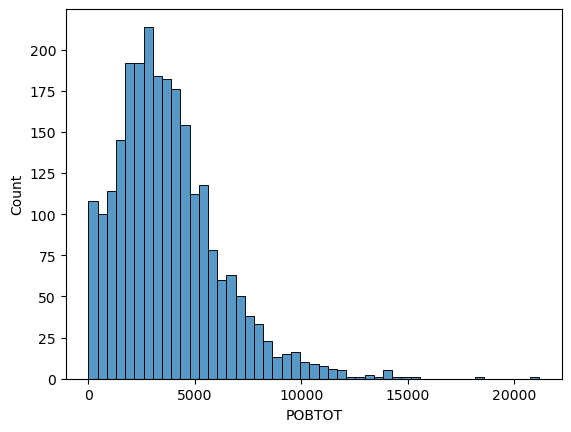

In [25]:
_ = sns.histplot(db['POBTOT'], kde = False)



La función [`histplot`]() de seaborn nos regresa el histograma, el argumento `kde=False` le dice que no queremos que ajuste una distribución empírica.

::: {.callout-note}
Cuando hicimos `_ = sns.histplot(db['POBTOT'], kde = False)` estamos asignando el resultado a la variable `_`, esto se hace comunmente cuando no queremos ya hacer nada más con ese resultado. Más adelante haremos operaciones sobre las gráficas.
:::

#### Densidad de Kernel

Otra forma de representar la distribución de una variable es ajustando una _densidad de kernel_, que estima una distribución (empírica) de probabilidad a partir de nuestras observaciones.

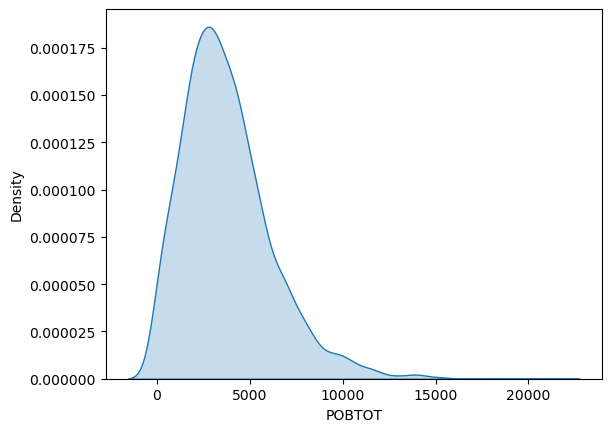

In [26]:
_ = sns.kdeplot(db['POBTOT'], fill = True)

Otra visualización muy útil es la de la _distribución conjunta_ de dos variables. Por ejemplo, supongamos que queremos comparar las distribuciones de la población masculina y femenina.

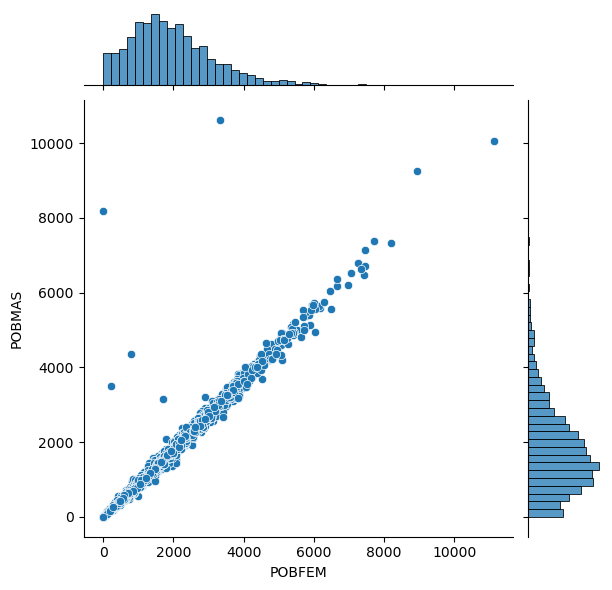

In [27]:
_ = sns.jointplot(data=db, x='POBFEM', y='POBMAS')

La relación, como es de esperarse, es casi perfectamente lineal, pero ver las distribuciones conjuntas nos permite identificar algunas AGEBS con poblaciones masculinas desproporcionadamente grandes ¿Qué serán?.

Muchas veces queremos visualizar la distribución conjunta de varias variables al mismo tiempo. Por ejemplo cuando queremos hacer ejercicios de regresión queremos explorar la correlación entre las covariables. Una forma de visualizar rápidamente estas distribuciones conjuntas es con un [`PairGrid`](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid). Utlicemos uno sencillo para ver las distribuciones de algunas variables. 

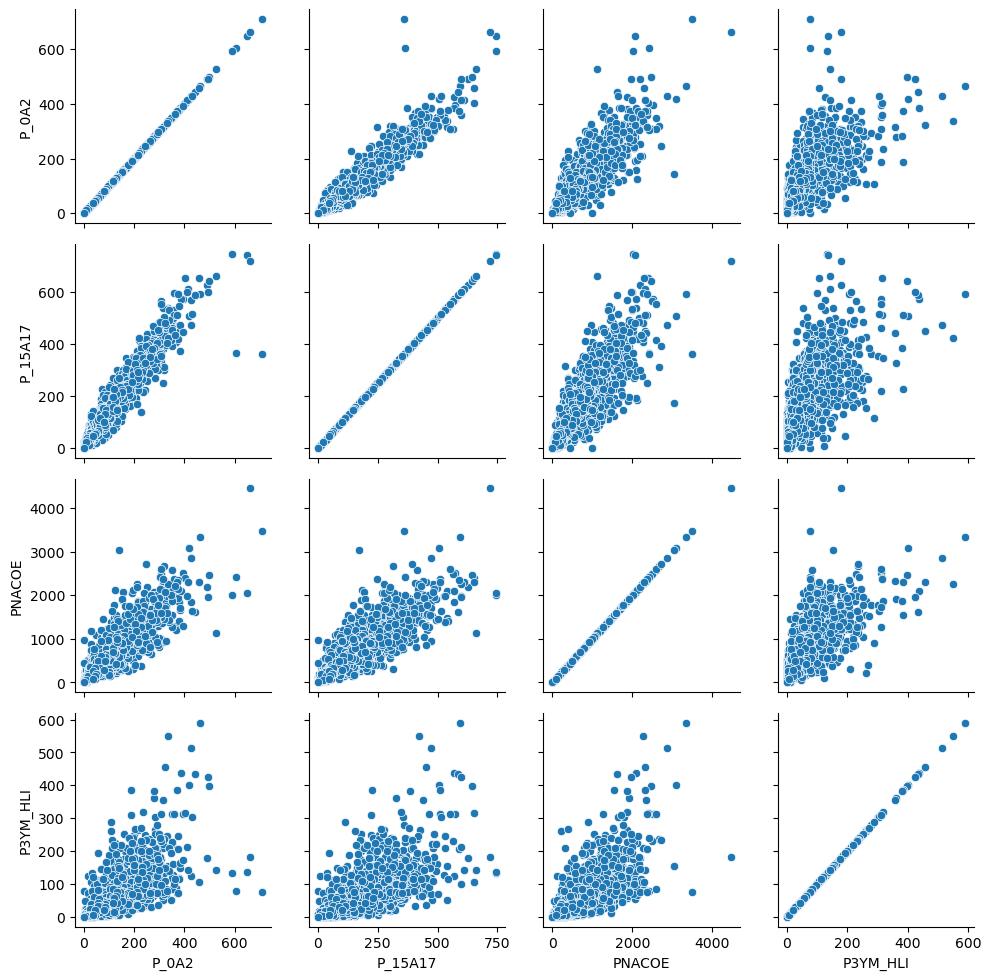

In [28]:
vars = ['P_0A2', 'P_15A17', 'PNACOE', 'P3YM_HLI']
g = sns.PairGrid(db[vars])
g = g.map(sns.scatterplot)

La función `PairPlot` sólo nos prepara la malla (un cuadrado del número de variables de los datos) y con el `map` llenamos esa malla con la gráfica que queramos, en nuestro caso un diagrama de dispersión.

En este caso la diagonal no es muy informativa, es un diagrama de dispersión de una variable consigo misma. `PairPlot` es muy flexible y nos permite _mapear_ diferentes funciones para la diagonal y los demás elementos, por ejemplo:

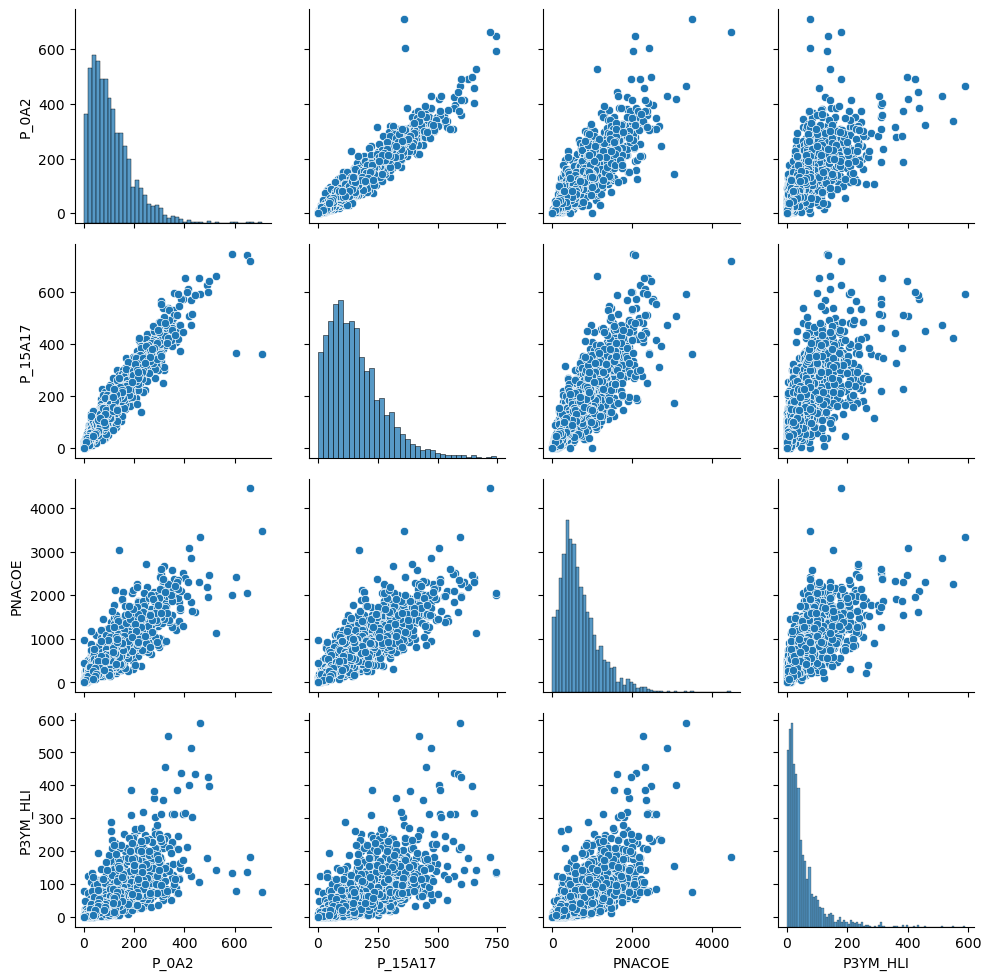

In [29]:
g = sns.PairGrid(db[vars])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

___
## Organizando los datos

Muchos flujos de análisis requieren organizar los datos en una estructura particular conocida como _Tidy Data_ (algo así como _datos ordenados_). La idea es tener una estructura estandarizada con principios comunes de manipulación que sirva como entrada a diferentes tipos de análisis. 

Las tres características fundamentales de un conjunto de datos _bien ordenado_ de acuerdo a los principios _tidy_ son:

1. Cada variable en una columna
2. Cada observación en una fila
3. Cada unidad de observación en una tabla

Para mayor información sobre el concepto de *Tidy Data*, puede consultarse el [Artículo Académico](https://www.jstatsoft.org/article/view/v059i10) original (de Acceso Libre), así como el [Repositorio Púlico](https://github.com/hadley/tidy-data) asociado a él.

Tratemos de aplicar el concepto de *Tidy Data* a los datos de la práctica. Primero, recordando su estructura:

In [30]:
db.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,pct_fem
3,09,Ciudad de México,002,Azcapotzalco,0001,Total AGEB urbana,0010,0,3183.0,1695.0,...,772.0,692.0,313.0,221.0,145.0,8.0,14.0,148.0,5.0,0.532516
30,09,Ciudad de México,002,Azcapotzalco,0001,Total AGEB urbana,0025,0,5593.0,2915.0,...,1510.0,1203.0,478.0,349.0,238.0,28.0,68.0,393.0,14.0,0.521187
82,09,Ciudad de México,002,Azcapotzalco,0001,Total AGEB urbana,003A,0,4235.0,2232.0,...,1049.0,878.0,361.0,339.0,247.0,5.0,12.0,250.0,NaN,0.527037
116,09,Ciudad de México,002,Azcapotzalco,0001,Total AGEB urbana,0044,0,4768.0,2551.0,...,1237.0,1076.0,481.0,452.0,294.0,10.0,17.0,254.0,NaN,0.535025
163,09,Ciudad de México,002,Azcapotzalco,0001,Total AGEB urbana,0097,0,2176.0,1115.0,...,562.0,507.0,276.0,260.0,153.0,4.0,3.0,70.0,0.0,0.512408


Esta base de datos no cumple con las características _tidy_. En efecto, tenemos las variables en columnas (sin contar los identificadores), pero:

* Tenemos dos tipos de unidades: personas y viviendas. El principio _tidy_ nos indica que necesitamos dos tablas para representar los datos.
* Para cada tipoi de unidad tenemos en la misma fila tantas _observaciones_ como variables (del mismo tipo). Por ejemplo, el valor de la población para cada grupo de edad en cada AGEB es una observación.

Entonces, vamos a trabajar en acomodar la tabla a los principios _tidy_. Para comenzar, trabajemos sólo con las variables que representan segmentos de edad de la población. Seleccionar sólo estas columnas puede ser engorroso, pero si nos fijamos en el diccionario, podemos observar que todas las variables que nos interesan empiezan con 'P_' Podemos usar esta observación para seleccionar, a partir de la lista de columnas, sólo las que nos interesan:

In [36]:
cols_pob = [c for c in db.columns if c.startswith('P_')]
print(cols_pob)               

['P_0A2', 'P_0A2_F', 'P_0A2_M', 'P_3YMAS', 'P_3YMAS_F', 'P_3YMAS_M', 'P_5YMAS', 'P_5YMAS_F', 'P_5YMAS_M', 'P_12YMAS', 'P_12YMAS_F', 'P_12YMAS_M', 'P_15YMAS', 'P_15YMAS_F', 'P_15YMAS_M', 'P_18YMAS', 'P_18YMAS_F', 'P_18YMAS_M', 'P_3A5', 'P_3A5_F', 'P_3A5_M', 'P_6A11', 'P_6A11_F', 'P_6A11_M', 'P_8A14', 'P_8A14_F', 'P_8A14_M', 'P_12A14', 'P_12A14_F', 'P_12A14_M', 'P_15A17', 'P_15A17_F', 'P_15A17_M', 'P_18A24', 'P_18A24_F', 'P_18A24_M', 'P_15A49_F', 'P_60YMAS', 'P_60YMAS_F', 'P_60YMAS_M']


Ahora, vamos a construir un identificador único de AGEB para cada fila concatenando los identificadores de entidad, municipio, localidad y ageb:

In [37]:
db['AGEB_cvgeo'] = db['ENTIDAD'] + db['MUN'] + db['LOC'] + db['AGEB']
db['AGEB_cvgeo'].head()

3      0900200010010
30     0900200010025
82     090020001003A
116    0900200010044
163    0900200010097
Name: AGEB_cvgeo, dtype: object

Ya con este identificador, podemos eliminar de la tabla los identificadores que usamos para construirlo

In [38]:
db = db.drop(columns=['ENTIDAD', 'MUN', 'LOC', 'AGEB'])

Copiamos las columnas que nos interesan a una nueva tabla

In [48]:
rangos = db[['AGEB_cvgeo'] + cols_pob]
rangos.head()

,AGEB_cvgeo,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,...,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M
3,0900200010010,60.0,32.0,28.0,3123.0,1663.0,1460.0,3074.0,1639.0,1435.0,...,111.0,61.0,50.0,303.0,149.0,154.0,726.0,816.0,470.0,346.0
30,0900200010025,122.0,58.0,64.0,5470.0,2856.0,2614.0,5363.0,2805.0,2558.0,...,214.0,97.0,117.0,521.0,263.0,258.0,1436.0,1293.0,732.0,561.0
82,090020001003A,88.0,49.0,39.0,4147.0,2183.0,1964.0,4065.0,2138.0,1927.0,...,180.0,74.0,106.0,425.0,226.0,199.0,1067.0,931.0,546.0,385.0
116,0900200010044,110.0,49.0,61.0,4658.0,2502.0,2156.0,4560.0,2445.0,2115.0,...,175.0,87.0,88.0,487.0,241.0,246.0,1215.0,1132.0,672.0,460.0
163,0900200010097,40.0,16.0,24.0,2136.0,1099.0,1037.0,2100.0,1076.0,1024.0,...,90.0,45.0,45.0,204.0,96.0,108.0,508.0,562.0,311.0,251.0


Ahora vamos a reorganizar la tabla de forma que cada grupo de edad corresponda a una fila en lugar de una columna, de esta forma tenemos las observaciones en filas, de acuerdo al principio _tidy_.

Para lograr esto lo que tenemos que hacer es la operación inversa de un pivote, es decir, un _stack_. El método [`stack`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html) hace justo lo que necesitamos, sólo tenemos que especificar el índice (lo que distingue a cada observación) que queremos utilizar para cada fila, en este caso `AGEB_cvgeo`.

In [49]:
rangos = rangos.set_index('AGEB_cvgeo').stack()
rangos

AGEB_cvgeo               
0900200010010  P_0A2           60.0
               P_0A2_F         32.0
               P_0A2_M         28.0
               P_3YMAS       3123.0
               P_3YMAS_F     1663.0
                              ...  
0901700011524  P_18A24_M      230.0
               P_15A49_F     1111.0
               P_60YMAS       706.0
               P_60YMAS_F     394.0
               P_60YMAS_M     312.0
Length: 96555, dtype: float64

Perfecto, eso se parece bastante a lo que buscamos, sólo que en lugar de un DataFrame lo que tenemos es una Serie. Fíjense que para cada valor del índice (`AGEB_cvgeo`), tenemos todos los valores de los grupos de población.

Para convertir esto en un DataFrame lo más sencillo es quitar el índice que creamos con la función [`reset_index`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html):

In [50]:
rangos = rangos.reset_index()
rangos.head()

,AGEB_cvgeo,level_1,0
0,0900200010010,P_0A2,60.0
1,0900200010010,P_0A2_F,32.0
2,0900200010010,P_0A2_M,28.0
3,0900200010010,P_3YMAS,3123.0
4,0900200010010,P_3YMAS_F,1663.0


Ahora tenemos un DataFrame en el que el valor de la columna `AGEB_cvgeo` viene repetido para cada observación. Ya sólo necesitamos renombrar las columnas restantes para que nos indiquen más claramente su contenido:

In [51]:
rangos = rangos.rename(columns = {'level_1':'Grupo', 0:'Población'})
rangos.head()

,AGEB_cvgeo,Grupo,Población
0,0900200010010,P_0A2,60.0
1,0900200010010,P_0A2_F,32.0
2,0900200010010,P_0A2_M,28.0
3,0900200010010,P_3YMAS,3123.0
4,0900200010010,P_3YMAS_F,1663.0


!Ahora tenemos nuestra tabla acomodada a los principios _tidy!

## Agrupamiento, Transformación y Agregación
Una de las ventajas del proceso de limpieza anterior es que las tablas resultantes permiten realizar transformaciones avanzadas de forma directa; de las más comunes son las Operaciones de Agrupamiento (*Group-By*), las cuales permiten conjuntar observaciones utilizando sus etiquetas, índices o categorías, así como aplicar operaciones de caracter grupal.

Por ejemplo, si se quisiera sumar el total de la población perteneciente a cada subgrupo de edad, primero se necesita emplear uno de los operadores más populares y utilizados de `pandas`, y razón por la cual ha sido tan popularizado, llamado `.groupby()`:

In [38]:
pop_grupos = subgrupos_ordenDF.groupby('Subgrupo')
pop_grupos

Aunque `pop_grupos` no genera un resultado inmediatamente visible, si almacena la manera en que se realiza la agrupación y, por ende, nos permite realizar una multitud de operaciones, como la suma buscada a través del método `.sum()`:

In [39]:
pop_grupos.sum()

,Frecuencia
Subgrupo,
pob_0a2,354934
pob_12a14,392333
pob_15a17,423462
pob_18a24,1042926
pob_25a29,720664
pob_30a49,2591465
pob_3a5,388398
pob_50a59,895259
pob_60ymas,1001547


Asímismo, puede generarse un resumen de cada subgroup utilizando `.describe()`

In [40]:
pop_grupos.describe()

Frecuencia                                                        \
                count         mean         std  min     25%    50%      75%   
Subgrupo                                                                      
pob_0a2        2432.0   145.943257  112.056808  0.0   61.00  119.0   209.25   
pob_12a14      2432.0   161.321135  115.647911  0.0   74.00  138.5   226.25   
pob_15a17      2432.0   174.120888  121.923333  0.0   82.00  151.5   241.00   
pob_18a24      2432.0   428.834704  288.072840  0.0  218.00  382.5   580.25   
pob_25a29      2432.0   296.325658  201.741121  0.0  155.00  263.0   402.00   
pob_30a49      2432.0  1065.569490  693.264089  0.0  578.00  963.5  1417.25   
pob_3a5        2432.0   159.703125  121.498713  0.0   67.00  133.0   226.25   
pob_50a59      2432.0   368.116365  217.976714  0.0  221.75  342.0   492.50   
pob_60ymas     2432.0   411.820312  250.572492  0.0  233.75  392.0   562.00   
pob_6a11       2432.0   324.372944  240.267120  0.0  144.00  273.0   461.00   

                    
               max  
Subgrupo            
pob_0a2      743.0  
pob_12a14    772.0  
pob_15a17    760.0  
pob_18a24   2905.0  
pob_25a29   3099.0  
pob_30a49   8195.0  
pob_3a5      746.0  
pob_50a59   1401.0  
pob_60ymas  1525.0  
pob_6a11    1586.0

La versatilidad de `.groupby()` permite que sobre los grupos no sólo se puedan aplicar funciones genéricas, como `.sum()` o `.describe()`, sino también funciones generadas por el propio usuario, lo cual permite realizar casi cualquier tipo de transformacioń y agregación.

___
### Para Practicar...
Resulta útil aplicar lo aprendido sobre otro tipo de Conjuntos de Datos. Por ejemplo, la organización *Wikileaks* posee una Base de Datos pública en la cual se contiene, entre otras cosas, el número de casualidades existentes durante los primeros años de la [*Guerra de Afganistán*](https://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism), la cual puede ser consultada a través de la siguiente liga:

> https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1

Desde Python es posible visualizar la apariencia de esta información utilizando los siguientes comandos:

In [41]:
# Importar la librería a utilizar
from IPython.display import IFrame

# Guardar en una variable la URL de la información
url = 'https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1'

# Mostrar como ventana lo que arrojaría la URL
IFrame(url, 700, 400)

Realiza lo siguiente con estos datos:
* Descarga la tabla como un archivo de tipo `.csv` (Archivo --> Descargar como --> .csv, hoja actual)
* Importa los datos a Python
* Explora generando algunas gráficas
* Examina qué tanto se ajusta a los principios del *Tidy Data* y conviértelo de forma que lo haga
* Obten una cuenta total de las casualidades por mes y genera una gráfica con ésta